# **TELCO CUSTOMER CHURN**

AHMADES SEPTIAN RAHMADSYAH

# **CONTENT**

1. BUSINESS PROBLEMS

2. DATA UNDERSTANDING

3. MODELING

4. CONCLUTION AND RECOMMENDATION

In [264]:
# Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC
import category_encoders as ce

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb


from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Business Problem Understanding

**Context**

Dalam dunia komersial, pelanggan adalah raja. Memahami pelanggan adalah hal yang paling penting dan memahami pola perilaku mereka dapat menghasilkan keputusan bisnis yang sangat berdampak. Customer Churn adalah tingkat di mana pelanggan komersial meninggalkan bisnis/platform komersial dan membawa uangnya ke tempat lain, dan memahami pola dasar pelanggan akan sangat memengaruhi kemampuan bisnis untuk mempertahankan pelanggannya. Sebagai seorang peneliti data yang mencoba masuk ke dunia profesional, menurut saya penting untuk mendapatkan pemahaman yang lebih baik tentang seperti apa fitur churn data ini dan bagaimana fitur tersebut dapat digunakan untuk memahami pelanggan.

Seorang Data Scientist diminta untuk membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak dengan menggunakan machine learning. 

Target :

1 : Berhenti berlangganan (churn)

0 : Tidak berhenti berlangganan




**Problem Statement:**

Banyak faktor yang mempengaruhi alasan seorang pelanggan melakukan Churn. Mungkin fakta bahwa ada pesaing baru di pasar yang menawarkan harga lebih baik atau mungkin layanan yang mereka dapatkan belum sesuai standar, dll.

Perusahaan telekomunikasi dapat memberikan insentif retensi seperti memberikan potongan harga, memberikan paket layanan yang menarik, memberikan
prioritas pelayanan dan lain-lain dalam upaya untuk mempertahankan pelanggan. Namun, kebijakan pemberian insentif retensi belum sepenuhnya dilakukan secara efektif. Karena jika insentif retensi tersebut diberikan secara merata kepada seluruh pelanggan, maka pengeluaran biaya tersebut menjadi tidak efektif dan mengurangi potensi keuntungan apabila pelanggan tersebut memang loyal dan tidak ingin berhenti berlangganan.

**Goals:**

Berdasarkan permasalahan tersebut, perusahaan ingin memprediksi pelanggan mana yang loyal dan akan churn berdasankan waktu tertentu. Hal ini sejalan untuk meningkatkan potensi keuntungan yang akan diperoleh perusahaan. Dan juga, perusahaan ingin mengetahui faktor-faktor apa saja yang cenderung mempengaruhi pelanggan bertahan, sehingga mereka dapat membuat program-program yang lebih tepat sasaran dalam mengurangi jumlah pelanggan yang churn. 

**Analytic Approach:**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan berhenti berlangganan (churn) atau tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan berhenti berlangganan (churn) atau tidak. 

**Metric Evaluation**

Type 1 error : False Positive (pelanggan yang aktualnya tidak churn tetapi diprediksi churn)
Konsekuensi: tidak efektifnya pemberian insentif retensi

Type 2 error : False Negative (pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn)
Konsekuensi: kehilangan pelanggan

Berdasarkan konsekuensinya, maka hal terbaik yang dapat dioptimasikan yaitu meminimalkan biara yang dikeluarkan untuk penawaran khusus untuk pelanggam tetapi juga tidak membuat pelanggan menjadi churn/tidak berlangganan lagi. Maka metric yang cocok untuk hal ini adalah recall  yaitu memaksimalkan nilai **Recall/True Positive Rate** dan meminimalkan **False Negatif**. Hal ini sama dengan mengoptimalkan nilai recall, sehinggan recall menjadi parameter kunci dalam kasus ini

# DATA UNDERSTANDING

Tahap pertama yang akan kita lakukan adalah memahami data yang akan kita gunakan

In [151]:
tc = pd.read_csv("C:\\Users\\Septian\\Downloads\\data_telco_customer_churn.csv")
tc.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [152]:
tc.tail()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes
4929,Yes,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.40,No


In [153]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [154]:
#Persentase churn
tc['Churn'].value_counts()/len(tc) *100

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64

In [155]:
tc['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

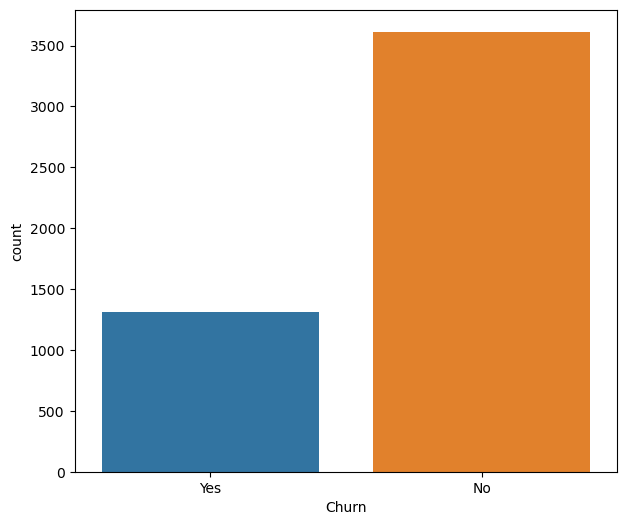

In [156]:
plt.figure(figsize=(7,6))
sns.countplot(data=tc, x='Churn')
plt.show()

- Data set Telco Customer Churn memiliki 11 kolom dan 4930 baris
- Informasi demografi pelanggan yaitu `Dependents`.
- Service yang digunakan oleh pelanggan : `Online Security`, `Online Backup`, `Internet Service`, `Device Protection`, `Tech Support`
- Informasi akun pelanggan : `tenure`, `Contract`, `PaperlessBilling`, dan `MonthlyCharges`
- Pelanggan yang berhenti berlangganan – kolomnya disebut `Churn`

- Kolom numerik yaitu `tenure` dan `MonthlyCharges`
- Kolom kategorikal yaitu:
   - `Dependents`       : Apakah pelanggan memiliki ketergantungan atau tidak (Yes/No). 
   - `Online Security`  : Apakah pelanggan memiliki keamanan secara online (Yes/No).  
   - `Online Backup`    : Apakah pelanggan memiliki backup secara online (Yes/No).
   - `Internet Service` : Jenis layanan internet yang digunakan pelanggan.
   - `Device Protection`: Apakah Pelanggan memiliki keamanan perangkatat (Yes/No).
   - `Tech Support`     : Apakah Pelanggan memiliki bantuan teknis (Yes/No)
   - `Contract`         : Tipe kontrak pelanggan
   - `PaperlessBilling` : Pembayaran tanpa bill kertas (Yes/No)
- Kolom target adalah `churn` dengan nilai no sebesar 3614 dan yes 1316

In [157]:
tc.describe(include='object')

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


In [158]:
tc.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [159]:
pd.set_option('display.max_colwidth', 0)
# Identifikasi jumlah unique, persentase missing value, dan unique pada dataset.
listItem = []
for col in tc.columns :
    listItem.append( [col, tc[col].nunique(), tc[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


- **Tenure** berupa data diskrit dengan nilai bervariasi antara 0 sampai dengan 72 bulan dengan median pada 29 bulan
- Terdapat 3 pilihan Contract yaitu Month-to-month, One year, dan Two Year
- **InternetService** berisi pilihan berupa 'DSL', 'Fiber Optic' dan 'No'
- **MonthlyCharges** berupa data kontinu dengan nilai rata-rata 64.8
- **Dependent, Paperless Billing, dan Churn** memiliki nilai 'Yes' atau 'No'
- **OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport** berisi pilihan 'Yes', 'No' atau 'No internet service'.


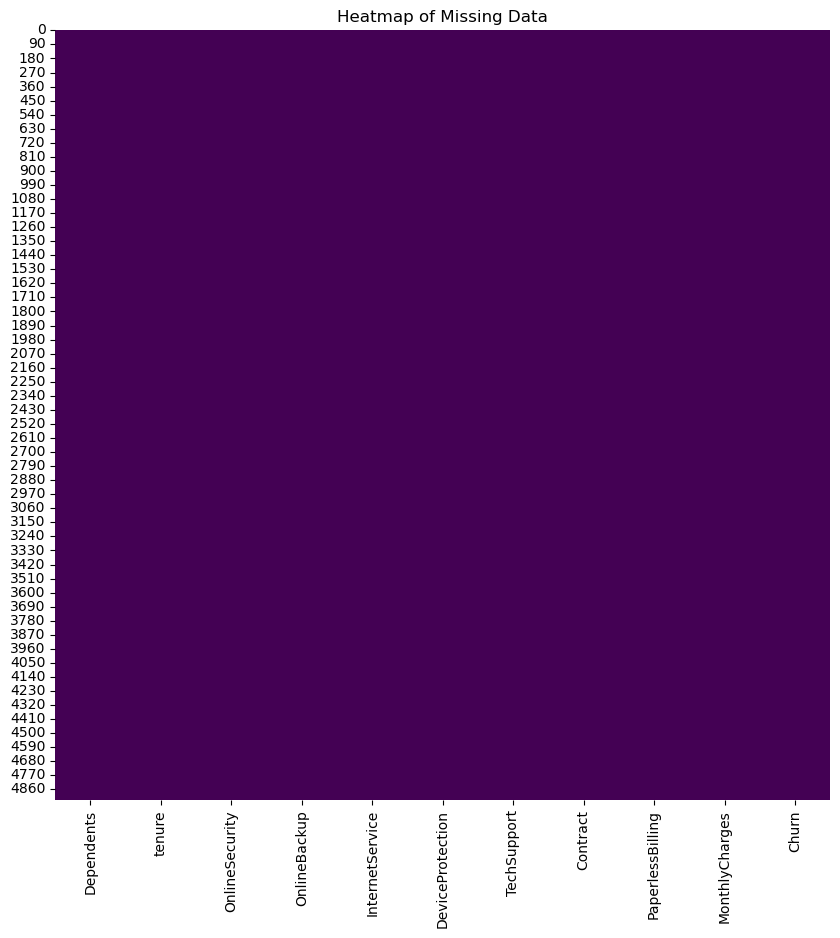

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(tc.isna(), cbar=False, cmap='viridis')

plt.title('Heatmap of Missing Data')
plt.show()

In [161]:
tc.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Dapat dilihat bahwa data tidak memiliki missing value

# EDA

FEATURE KATEOGIKAL

In [162]:
kategoikal = [feature for feature in tc.columns if tc[feature].dtypes == 'O']
kategoikal

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

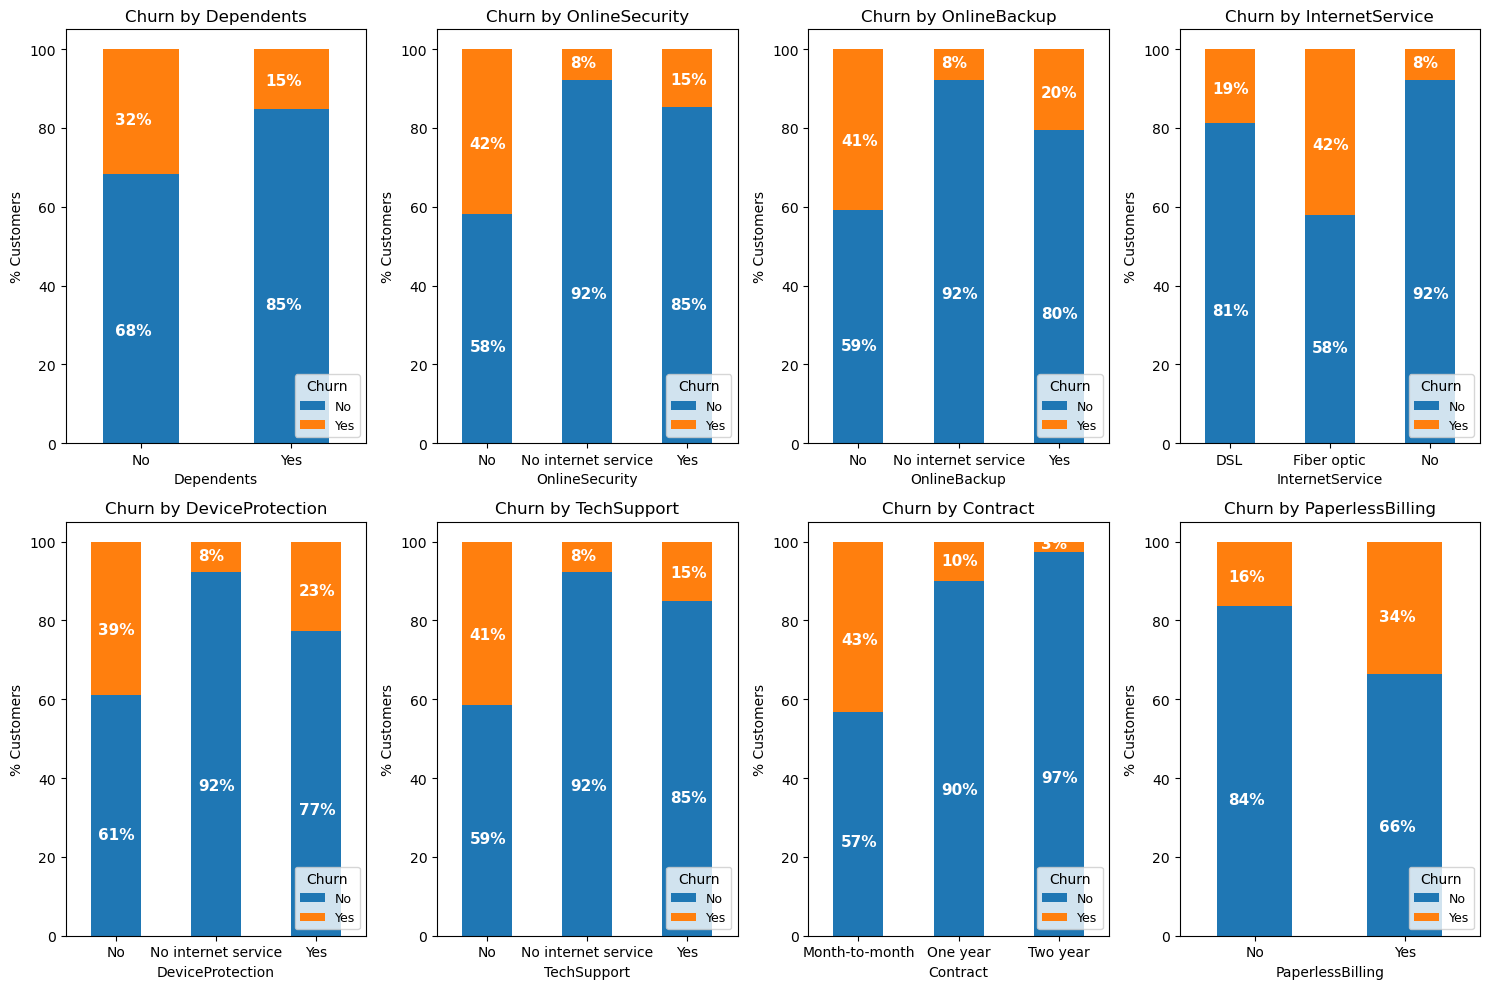

In [163]:
plt.figure(figsize=(15, 10))
plotnumber = 1

for feature in kategoikal[:-1]:

        column1 = feature

        # create a new subplot for every source
        groupby_table = tc.groupby([column1,'Churn']).size().unstack()

        # Label data
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot
        ax = plt.subplot(2, 4, plotnumber)
        
        # Harga rumah berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar',
                                                                width = 0.5,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = ax,)

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # labeling the bars
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
        
        plt.tight_layout();
        
        plotnumber += 1

- Pelanggan yang tidak memiliki `Dependent` lebih cenderung untuk berhenti berlangganan (churn) dibandingkan Pelanggan yang memiliki `Dependent`
- Pelanggan yang `InternetService`nya menggunakan Fiber optic lebih cenderung untuk berhenti berlangganan (churn) dibandingkan `InternetService` yang lain.
- Pelanggan yang tidak menggunakan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` lebih cenderung untuk berhenti berlangganan (churn) dibandingkan yang menggunakan.
- Pelanggan yang `Contract`nya Month-to-month lebih cenderung untuk berhenti berlangganan (churn) dibandingkan `Contract` yang lain. Bahkan yang `Contract`nya Two year hanya memiliki persentase churn sekitar 3%.
- Pelanggan yang menggunakan `PaperlessBilling` lebih cenderung untuk berhenti berlangganan (churn) dibandingkan dengan yang tidak

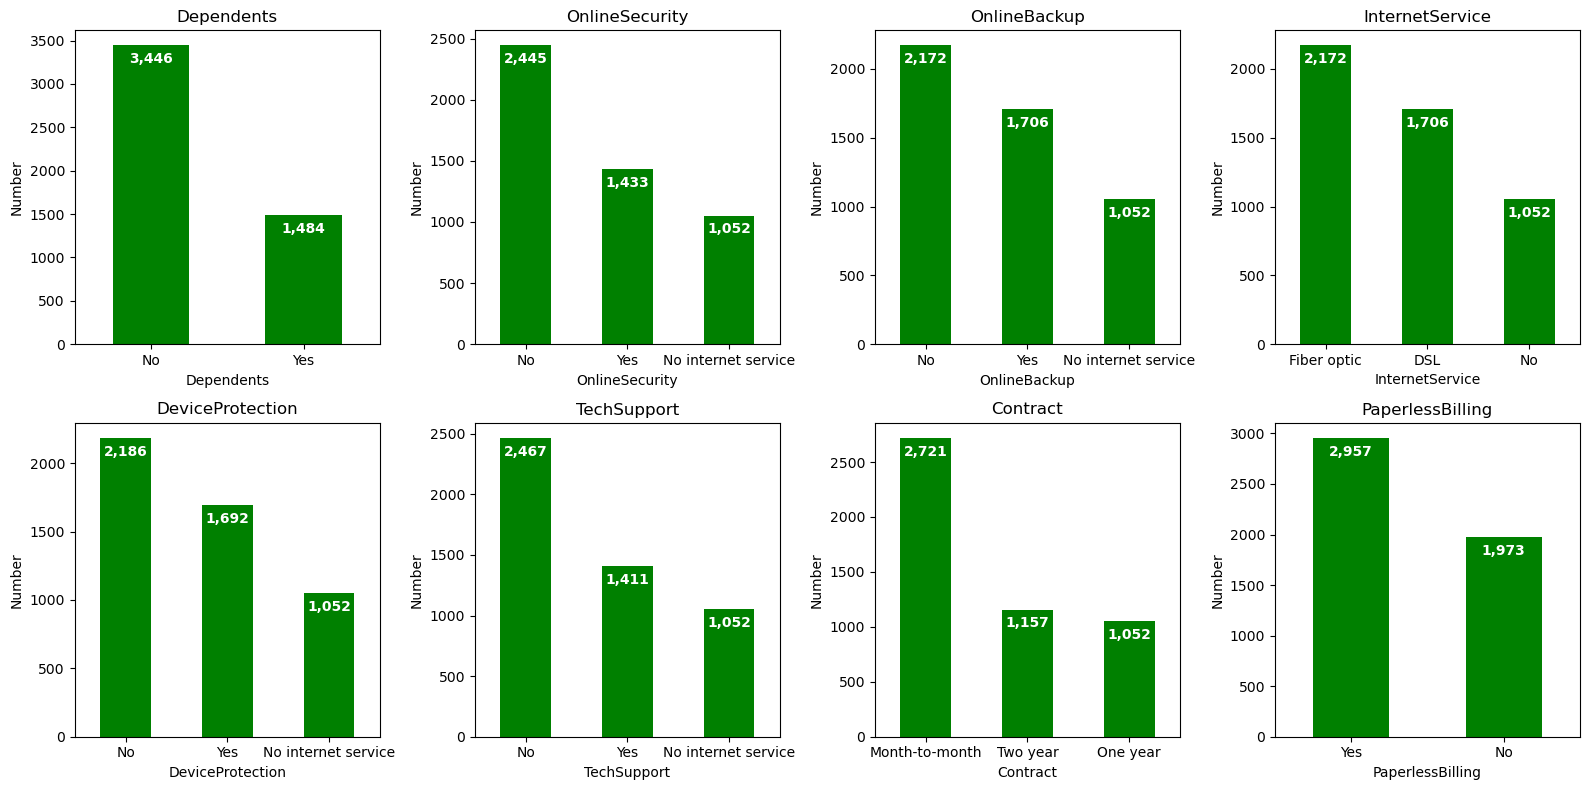

In [164]:
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1

for feature in kategoikal[:-1]:
    # subplot (letak grafik)
    ax = plt.subplot(2, 4, plotnumber)
    ax = tc[feature].value_counts().plot(kind = 'bar', rot = 0, color=['green'])
    plt.ylabel('Number')
    plt.xlabel(feature)
    plt.title(feature, fontsize=12)
    container = ax.containers[0]
    ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = -15, color="white", fontweight='bold')
    plt.tight_layout();
    plotnumber += 1

- Mayoitas Pelanggan tidak memiliki tanggungan
- mayoritas pelanggan tidak menggunakan online security, online backup, dan device protection
- mayoritas pelanggan menggunakan internet fiber optic
- Mayoritas pelanggan memiliki kontrak month to month
- Banyak pelanggan yang menggunakan sistem paperlessBilling

**FEATURE NUMERIK**

In [165]:
numerik = [feature for feature in tc.describe().columns]
numerik

['tenure', 'MonthlyCharges']

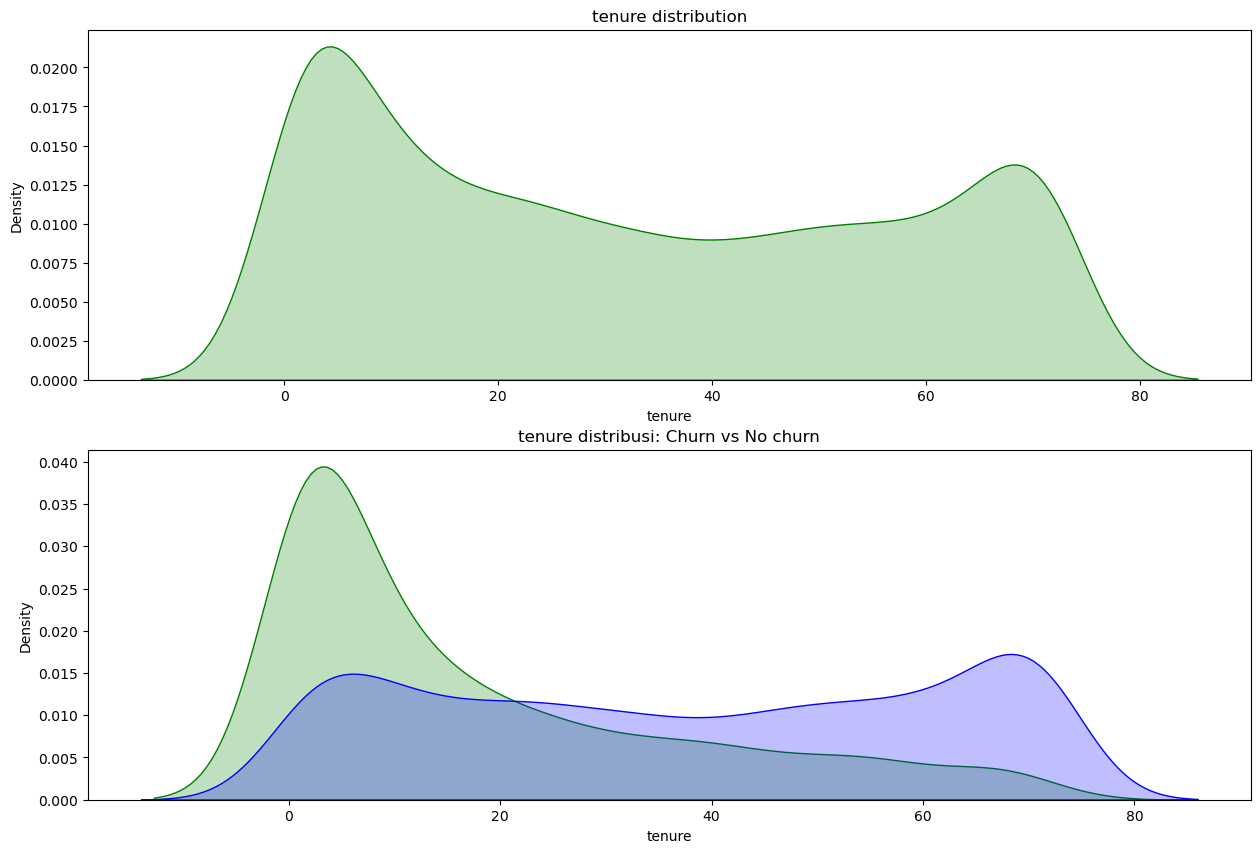

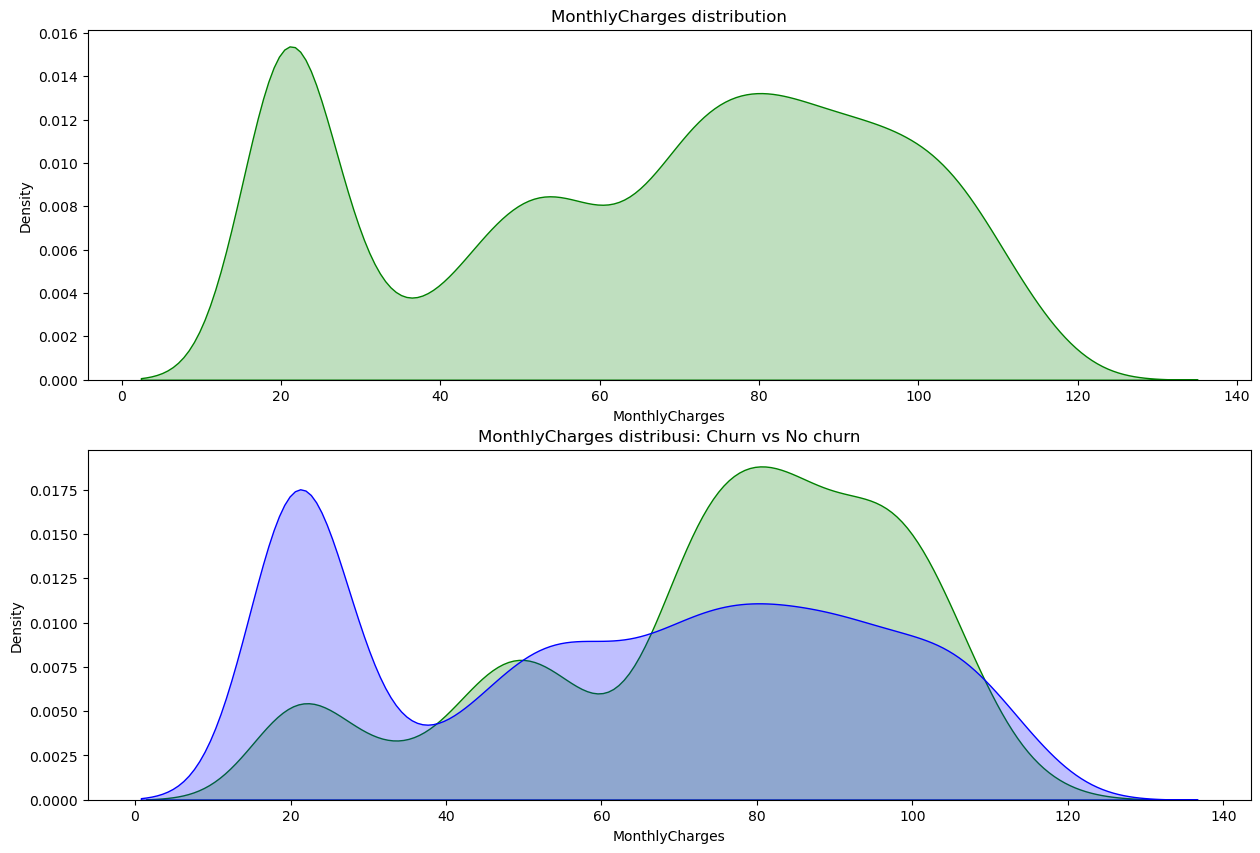

In [166]:
def Numerical_distribution(tc,feature):
    """ Distribution of numerical variable based on target variable"""
    fig = plt.figure(figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax = sns.kdeplot(tc[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str =  feature + " distribution"
    plt.title(title_str)
    
    plt.subplot(2,1,2)
    ax = sns.kdeplot(tc.loc[(tc['Churn']== 'Yes'),feature]
                     , color = 'g'
                     , shade = True
                     , label='Chrun')

    ax = sns.kdeplot(tc.loc[(tc['Churn']=='No') ,feature]
                     , color = 'b'
                     , shade = True
                     , label='No Chrun')
    
    title_str = feature + " distribusi: Churn vs No churn"
    plt.title(title_str)
    plt.show()
Numerical_distribution(tc,'tenure')
Numerical_distribution(tc,'MonthlyCharges')

Text(0, 0.5, 'Jumlah Pelanggan')

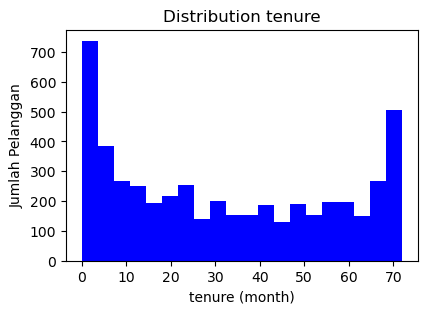

In [167]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.hist(tc['tenure'], bins=20, color='blue')
plt.title('Distribution tenure')
plt.xlabel('tenure (month)')
plt.ylabel('Jumlah Pelanggan')


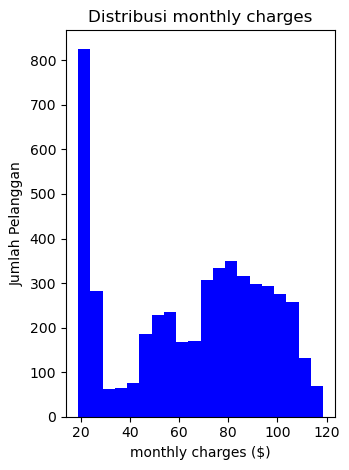

In [168]:
plt.subplot(1, 2, 1)
plt.hist(tc['MonthlyCharges'], bins=20, color='blue')
plt.title('Distribusi monthly charges')
plt.xlabel('monthly charges ($)')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

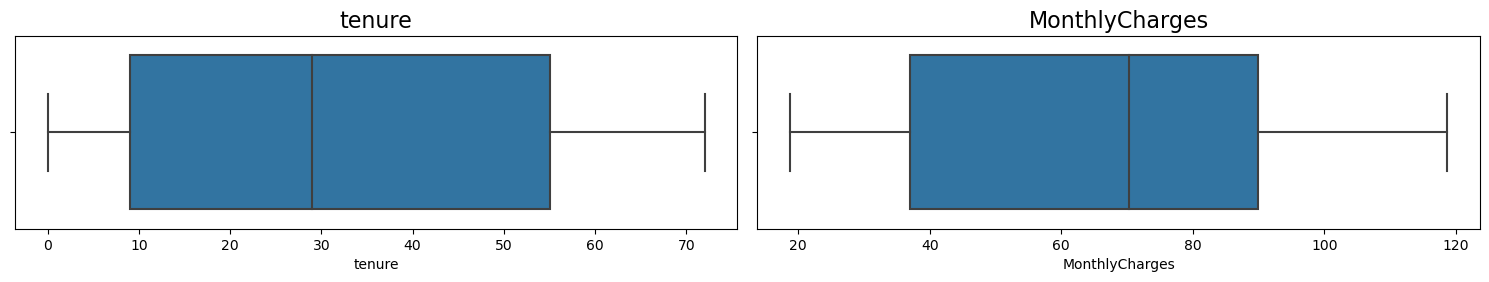

In [169]:
plt.figure(figsize=(15, 5), facecolor='white')
plotnumber = 1
    
for feature in numerik:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(x=feature, data=tc);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

- Dapat Dilihat bahwa tenure dan monthly charges tidak terdistribusi dengan normal
- tidak terdapat outlier pada tenure dan monthly charges

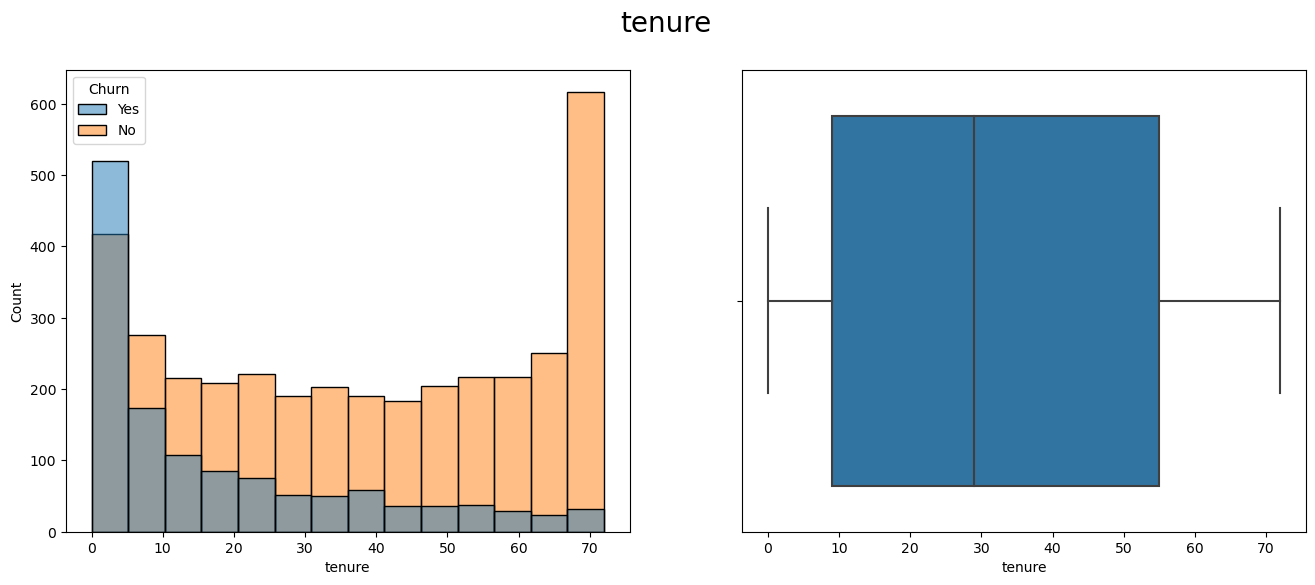

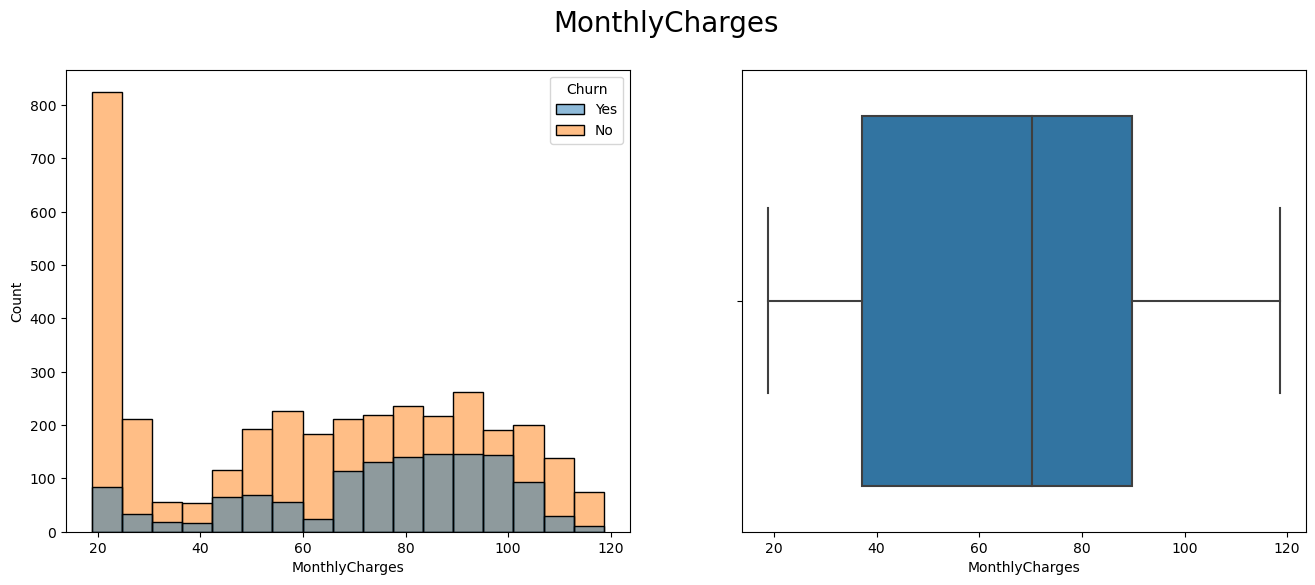

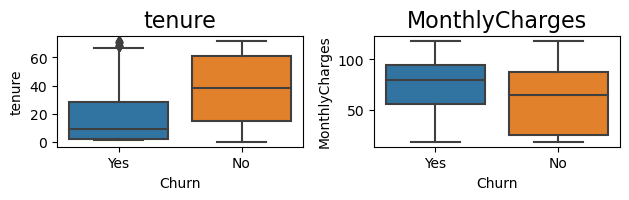

In [170]:
for col in numerik:
    fig, axes = plt.subplots(1, 2, figsize=(16,6))
    plt.suptitle(col, fontsize=20)
    sns.histplot(data=tc, x=col, hue='Churn', ax=axes[0])
    sns.boxplot(data=tc, x=col, hue='Churn', ax=axes[1])
    plt.show()
for feature in numerik:
    ax = plt.subplot(3,2, plotnumber)
    sns.boxplot(y=feature, x='Churn', data=tc);
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber = plotnumber + 1

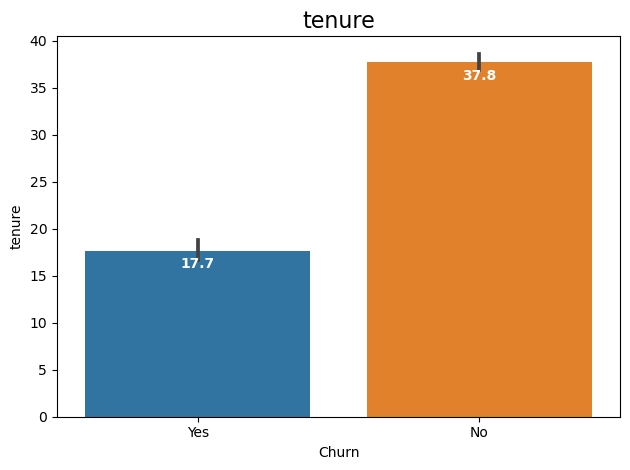

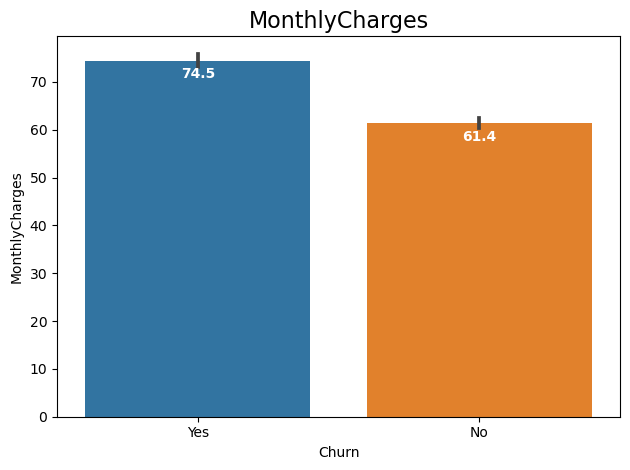

In [171]:
for feature in numerik:
    plt.figure(plotnumber)  # Create a new figure for each plot
    ax = sns.barplot(y=feature, x='Churn', data=tc)
    plt.title(feature, fontsize=16)
    
    # Add bar labels
    container = ax.containers[0]
    ax.bar_label(container, labels=[f'{x:,.1f}' for x in container.datavalues], label_type='edge', padding=-15, color="white", fontweight='bold')
    
    plt.tight_layout()
    plotnumber += 1

plt.show()  # Display all plots

- Dapat dilihat bahwa pelanggan dengan tenure yang lama cenderung tidak churn, sedangkan pelanggan dengan masa tenure yang kecil cenderung churn
- Dapat dilihat bahwa tidak terlalu ada perbedaan antara pelanggan dengan monthly charge yanng lebih besar dan yang kecil dalam memilih churn, memang dari gambar diatas dapat dilihat bahwa pelanggan dengan monthly charges yang lebih besar cenderung churn, tetapi selisihnya tidak terlalu besar

# DATA PREPARATION

melakukan copy data fame terlebih dahulu agar dataframe awal tidak hilang

In [172]:
tc_churn = tc.copy()

**MENGUBAH NILAI**

**-CHURN-**

Kolom churn berisikan nilai "yes" dan "no", jadi akan kita ubah menjadi nilai `1` untuk "yes" dan `0` untuk "no"

0 : Tidak berhenti berlangganan (`Churn` == 'No')

1 : Berhenti berlangganan (`Churn` == 'Yes')

In [173]:
tc_churn['Churn'] = np.where(tc_churn['Churn']=='No',0,1)
tc_churn['Churn'].unique()

array([1, 0])

**MENGGANTIKAN "NO INTERNET SERVICE" MENJADI "NO"**

Nilai dari "no internet service' dapat kita anggap menjadi nilai "no", dikarenakan tidak memakai internet sama saja dengan tidak memakai layanan yang berhubungan dengan internet service

In [174]:
df_no_internet = tc_churn[tc_churn['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,1,[No internet service]
1,OnlineBackup,1,[No internet service]
2,InternetService,1,[No]
3,DeviceProtection,1,[No internet service]
4,TechSupport,1,[No internet service]


Dapat dilihat bahwa terdapat 4 kolom/feature yang memiliki nilai no internet service, sehingga hal tersebut akan kita ganti


In [175]:
ganti = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
for i in ganti:
    tc_churn[i] = tc_churn[i].replace({'No internet service': 'No'})

In [176]:
listItem = []
for col in tc_churn.columns[2:7] :
    listItem.append( [col, tc_churn[col].nunique(), tc_churn.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,2,"[No, Yes]"
1,OnlineBackup,2,"[No, Yes]"
2,InternetService,3,"[DSL, Fiber optic, No]"
3,DeviceProtection,2,"[No, Yes]"
4,TechSupport,2,"[No, Yes]"


**MISSING VALUE**

In [177]:
tc.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

**DUPLICATE DATA**

In [178]:
tc.duplicated().sum()

77

Terdapat 77 duplikat pada data yang kita gunakan

In [179]:

print('persentase', tc['Churn'].value_counts() / len(tc) * 100)

persentase Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64


In [180]:
tc = tc.drop_duplicates(keep='first') 
tc.duplicated().sum()

0

In [181]:

print('persentase', tc['Churn'].value_counts() / len(tc) * 100) 

persentase Churn
No     73.459716
Yes    26.540284
Name: count, dtype: float64


Tidak terdapat perbedaan persentase churn setelah data yang duplikat di drop

**ENCOCING**

Saya akan menggunakan metode One Hot Encoding pada kolom **'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', dan 'PaperlessBilling'**. One Hot Encoding cocok di sini karena:

1. Ciri-ciri ini bersifat non-ordinal, artinya tidak ada urutan yang berarti di antara kategori-kategori dalam ciri-ciri tersebut.
2. Jumlah nilai unik (data unik) pada setiap fitur dibatasi.

Dalam One Hot Encoding, setiap kategori dalam suatu fitur diubah menjadi kolom baru, dan setiap baris diberi nilai 1 atau 0 bergantung pada apakah kategori tersebut muncul di baris atau tidak. Proses ini efektif untuk model pembelajaran mesin yang mungkin kesulitan memahami hubungan dalam data kategorikal.

dan saya akan menggunakan Ordinal Encoder pada kolom **contract dan Internet service**

In [182]:
listItem = []
for col in kategoikal[:-1] :
    listItem.append( [col, tc_churn[col].nunique(), tc_churn.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,Dependents,2,"[No, Yes]"
1,OnlineSecurity,2,"[No, Yes]"
2,OnlineBackup,2,"[No, Yes]"
3,InternetService,3,"[DSL, Fiber optic, No]"
4,DeviceProtection,2,"[No, Yes]"
5,TechSupport,2,"[No, Yes]"
6,Contract,3,"[Month-to-month, One year, Two year]"
7,PaperlessBilling,2,"[No, Yes]"


In [336]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [334]:
transformer = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract']),
], remainder='passthrough')

**PENGSKALAAN**

In [335]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler = MinMaxScaler()

Mengingat dalam pembuatan model machine learning nantinya kita juga akan mencoba menggunakan algoritma Logistic Regression dan KNN maka kita akan menerapkan scaling.

Harapannya dengan memiliki fitur pada skala yang sama maka kinerja algoritma machine learning akan meningkat karena setiap fitur dapat berkontibusi sama pada target. Jika tidak dilakukan scaling maka variabel skala besar akan mendominasi fitur skala kecil khususnya untuk algoritma yang memperhitungkan jarak seperti KNN.

Kemudian karena data pada kolom numerikal `tenure` dan `MonthlyCharges` juga tidak terdapat outlier (berdasarkan boxplot di pada EDA), maka kita bisa menggunakan MinMaxScaler().

**DATA IMBALANCE**

Data yang dimiliki tidak seimbang, dimana terdapat selisih yang sangat jauh antara data churn dan tidak churn

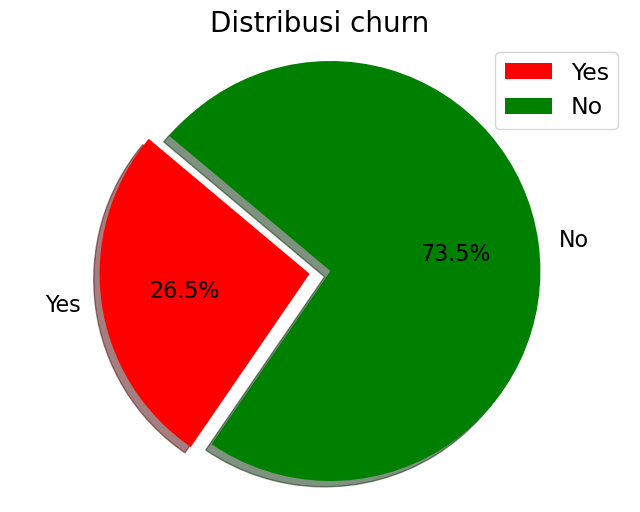

In [187]:

perhitungan_churn = tc['Churn'].value_counts(normalize=True) * 100
persentase_churn = perhitungan_churn['Yes']
labels = ['Yes', 'No']
sizes = [persentase_churn, 100 - persentase_churn]
colors = ['red', 'green']
explode = (0.1, 0)  
label_fontsize = 17  
title_fontsize = 20  
autopct_fontsize = 16  
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 0 else ''
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: custom_autopct(pct),
        shadow=True, startangle=140, textprops={'fontsize': autopct_fontsize})
plt.axis('equal')  
plt.title('Distribusi churn', fontsize=title_fontsize)
plt.legend(labels, loc="best", fontsize=label_fontsize)
plt.show()

In [188]:
tc['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

**PENDEFINISIAN X DAN Y**

In [189]:
X = tc_churn.drop(columns = ['Churn'])
y = tc_churn['Churn']

X adalah feature dan Y adalah target, dimana x berisikan nilai `Dependents, tenure, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges` dan y berisikan nilai `Churn`

**PEMBAGIAN DATA**

Dalam pemodelan saya akan menggunakan data test sebesar 0.2 dengan artian ada 20 persen data yang digunakan dalam data testing

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

Saya menggunakan random state 42, dan dikarenakan kita akan menggunakan klasifikasi dalam pemodelan maka kita menggunakan stratify=y

In [278]:
y_train.value_counts() / len(y_train)*100

Churn
0    73.301217
1    26.698783
Name: count, dtype: float64

In [279]:
y_test.value_counts() / len(y_test)*100

Churn
0    73.326572
1    26.673428
Name: count, dtype: float64

# PEMODELAN

DALAM MENENTUKAN MODEL YANG AKAN DIGUNAKAN KITA AKAN MENGEVALUASI MODEL YANG AKAN KITA GUNAKAN yaitu **Logistic Regression, K-Nearest Neighbors, Decision Trees, XGBoost, Gradient Boosting, Random Forest, AdaBoost (Adaptive Boosting), CatBoost (Categorical Boosting), LightGBM (Light Gradient Boosting Machine)** 

### BENCHMARK TANPA SAMPLING

In [280]:
#Pendefinisian Model
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
Dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
cat = CatBoostClassifier(verbose=False,random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

In [281]:
skfold = StratifiedKFold(n_splits = 5)

In [341]:
from imblearn.pipeline import Pipeline

In [342]:
nama_model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'Gradboost', 'Catboost', 'XGBoost', 'LightGBM']
models = [logreg,knn,Dt,rf,ada,grad,cat,xgb,lgbm]
Score = []
Rata_recall = []
std = []
for model in  models :
    estimator  = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('algo', model)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric
    Score.append(model_cv)  
    Rata_recall.append(model_cv.mean()*100)
    std.append(model_cv.std())
    

[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901
[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 10
[LightGBM] [Info] [binary:Bo

In [343]:
Score_df = pd.DataFrame(Score)

# Display the DataFrame
print(Score_df)

          0         1         2         3         4
0  0.533333  0.507109  0.545024  0.488152  0.528571
1  0.542857  0.469194  0.450237  0.492891  0.480952
2  0.461905  0.488152  0.483412  0.507109  0.471429
3  0.514286  0.488152  0.483412  0.483412  0.514286
4  0.557143  0.516588  0.530806  0.521327  0.523810
5  0.523810  0.497630  0.521327  0.507109  0.547619
6  0.523810  0.521327  0.545024  0.497630  0.542857
7  0.561905  0.535545  0.459716  0.497630  0.504762
8  0.542857  0.521327  0.502370  0.483412  0.571429


In [344]:
pd.DataFrame({'model':nama_model,'recall rata-rata':Rata_recall,'sdev':std}).set_index('model').sort_values(by='recall rata-rata',ascending=False) 

,recall rata-rata,sdev
model,,
Adaboost,52.993455,0.014358
Catboost,52.612954,0.017190
LightGBM,52.427894,0.030748
Logistic Regression,52.043782,0.020283
Gradboost,51.949898,0.016997
XGBoost,51.191153,0.034749
Random Forest,49.670955,0.014455
KNN,48.722636,0.031176
Decision Tree,48.240126,0.015395


Dapat dilihat bahwa Adaboost memiliki nilai rata-rata recall yang tertinggi diikuti oleh Catboost dan LightGBM, pada peringkat terbawah ada random forest dengan nilai recall rata-rata 48 persen

Saya akan coba melakukan resampling untuk melihat perubahan recall yang dihasilkan, pada hal ini saya akan menggunakan resampling ~SMOTENC~. dimana SMOTENC adalah Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTENC). Hal ini dikarenakan : 
- untuk menghindari terbuangnya data pada kelas mayoritas jika menggunakan undersampling sehingga dapat menghilangkan
informasi penting pada data tersebut. 
- untuk menghindari overfitting karena penduplikasian data yang telah ada sebelumnya sehingga pengklasifikasi terkena informasi yang sama jika menggunakan Random Oversampling.
- pada data kita terdapat fitur yang numerikal (continuous) and kategorikal (nominal).

### BENCHMARK DENGAN SAMPLING

In [345]:
resample = SMOTENC(random_state=42, categorical_features=[0, 2, 3, 4, 5, 6, 7, 8])

In [347]:
nama_model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'Gradboost', 'Catboost', 'XGBoost', 'LightGBM']
models = [logreg,knn,Dt,rf,ada,grad,cat,xgb,lgbm]
list_mean_with_sampling = []
list_std_with_sampling = []
list_mean_without_sampling = []
list_std_without_sampling = []
for model in  models :
    #MODEL DENGAN SAMPLING
    estimator_sampling  = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)])
    model_cv_with_sampling=cross_val_score(estimator_sampling,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric 
    list_mean_with_sampling.append(model_cv_with_sampling.mean()*100)
    list_std_with_sampling.append(model_cv_with_sampling.std())
    #MODEL TANPA SAMPLING
    estimator_no_sampling  = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('algo', model)])
    model_cv_without_sampling=cross_val_score(estimator_no_sampling,X_train,y_train,cv=skfold,scoring='recall')  # Recall is used as the evaluation metric 
    list_mean_without_sampling.append(model_cv_without_sampling.mean()*100)
    list_std_without_sampling.append(model_cv_without_sampling.std())


[LightGBM] [Info] Number of positive: 2312, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 4624, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2313, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 4626, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

In [348]:
pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost', 'CatBoost', 'XGBoost', 'LightGBM'],
    'mean_recall_with_sampling' : list_mean_with_sampling,
    'mean_recall_without_sampling' : list_mean_without_sampling,
    'std_recall_with_sampling' : list_std_with_sampling,
    'std_recall_without_sampling' : list_std_without_sampling,
}).sort_values('mean_recall_with_sampling', ascending=False)

,model,mean_recall_with_sampling,mean_recall_without_sampling,std_recall_with_sampling,std_recall_without_sampling
4,AdaBoost,77.876777,52.993455,0.023767,0.014358
0,Logistic Regression,77.593771,52.043782,0.034038,0.020283
5,GradienBoost,74.364252,51.949898,0.024966,0.016997
6,CatBoost,70.940645,52.612954,0.016171,0.017190
8,LightGBM,68.855789,52.427894,0.023113,0.030748
7,XGBoost,66.102911,51.191153,0.041368,0.034749
1,KNN,65.815843,48.722636,0.030017,0.031176
3,Random Forest,60.308283,49.670955,0.038065,0.014455
2,Decision Tree,56.320921,48.240126,0.034282,0.015395


Setelah dilakukan resampling dengan SMOTENC didapat bahwa ada boost dan logistic regression memiliki nilai rata-rata recall tertinggi dengan 77% diikuti oleh ada boost dan gradienboost. Terlihat juga bahwa untuk rata-rata recall  lebih baik setelah dilakukan oversampling dibandingkan tanpa oversampling, hal ini dapat membantu dalam mengoptimalkan machine learning

### PERCOBAAN PADA TRAIN DAN TEST DATA

In [349]:
metrics = []
conf_matrix = []
index_names = []

# Iterate over both models and resampling methods
for model in models:
    pipeline = Pipeline([
        ('prep', transformer),
        ('scaler', scaler),
        ('resample', resample),
        ('algo', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    metrics.append([
        recall_score(y_test, y_pred) * 100,
        accuracy_score(y_test, y_pred) * 100,
        precision_score(y_test, y_pred) * 100,
        f1_score(y_test, y_pred) * 100
    ])
    
    conf_matrix.append(confusion_matrix(y_test, y_pred))
    index_names.append(model.__class__.__name__)  # Use the class name of the model for the index

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['Recall', 'Accuracy', 'Precision', 'F1'], index=index_names)

# Display Resample Result, Sort by recall
metrics_df = metrics_df.sort_values('Recall', ascending=False)
print(metrics_df.head())

[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Recall   Accuracy  Precision         F1
LogisticRegression          81.368821  75.862069  53.101737  64.264264
AdaBoostClassifier          78.707224  75.963489  53.350515  63.594470
GradientBoostingClassifier  76.425856  76.876268  54.768392  63.809524
CatBoostClassifier          73.764259  76.876268  54.957507  62.987013
LGBMClassifier              72.243346  76.166329  53.977273  61.788618


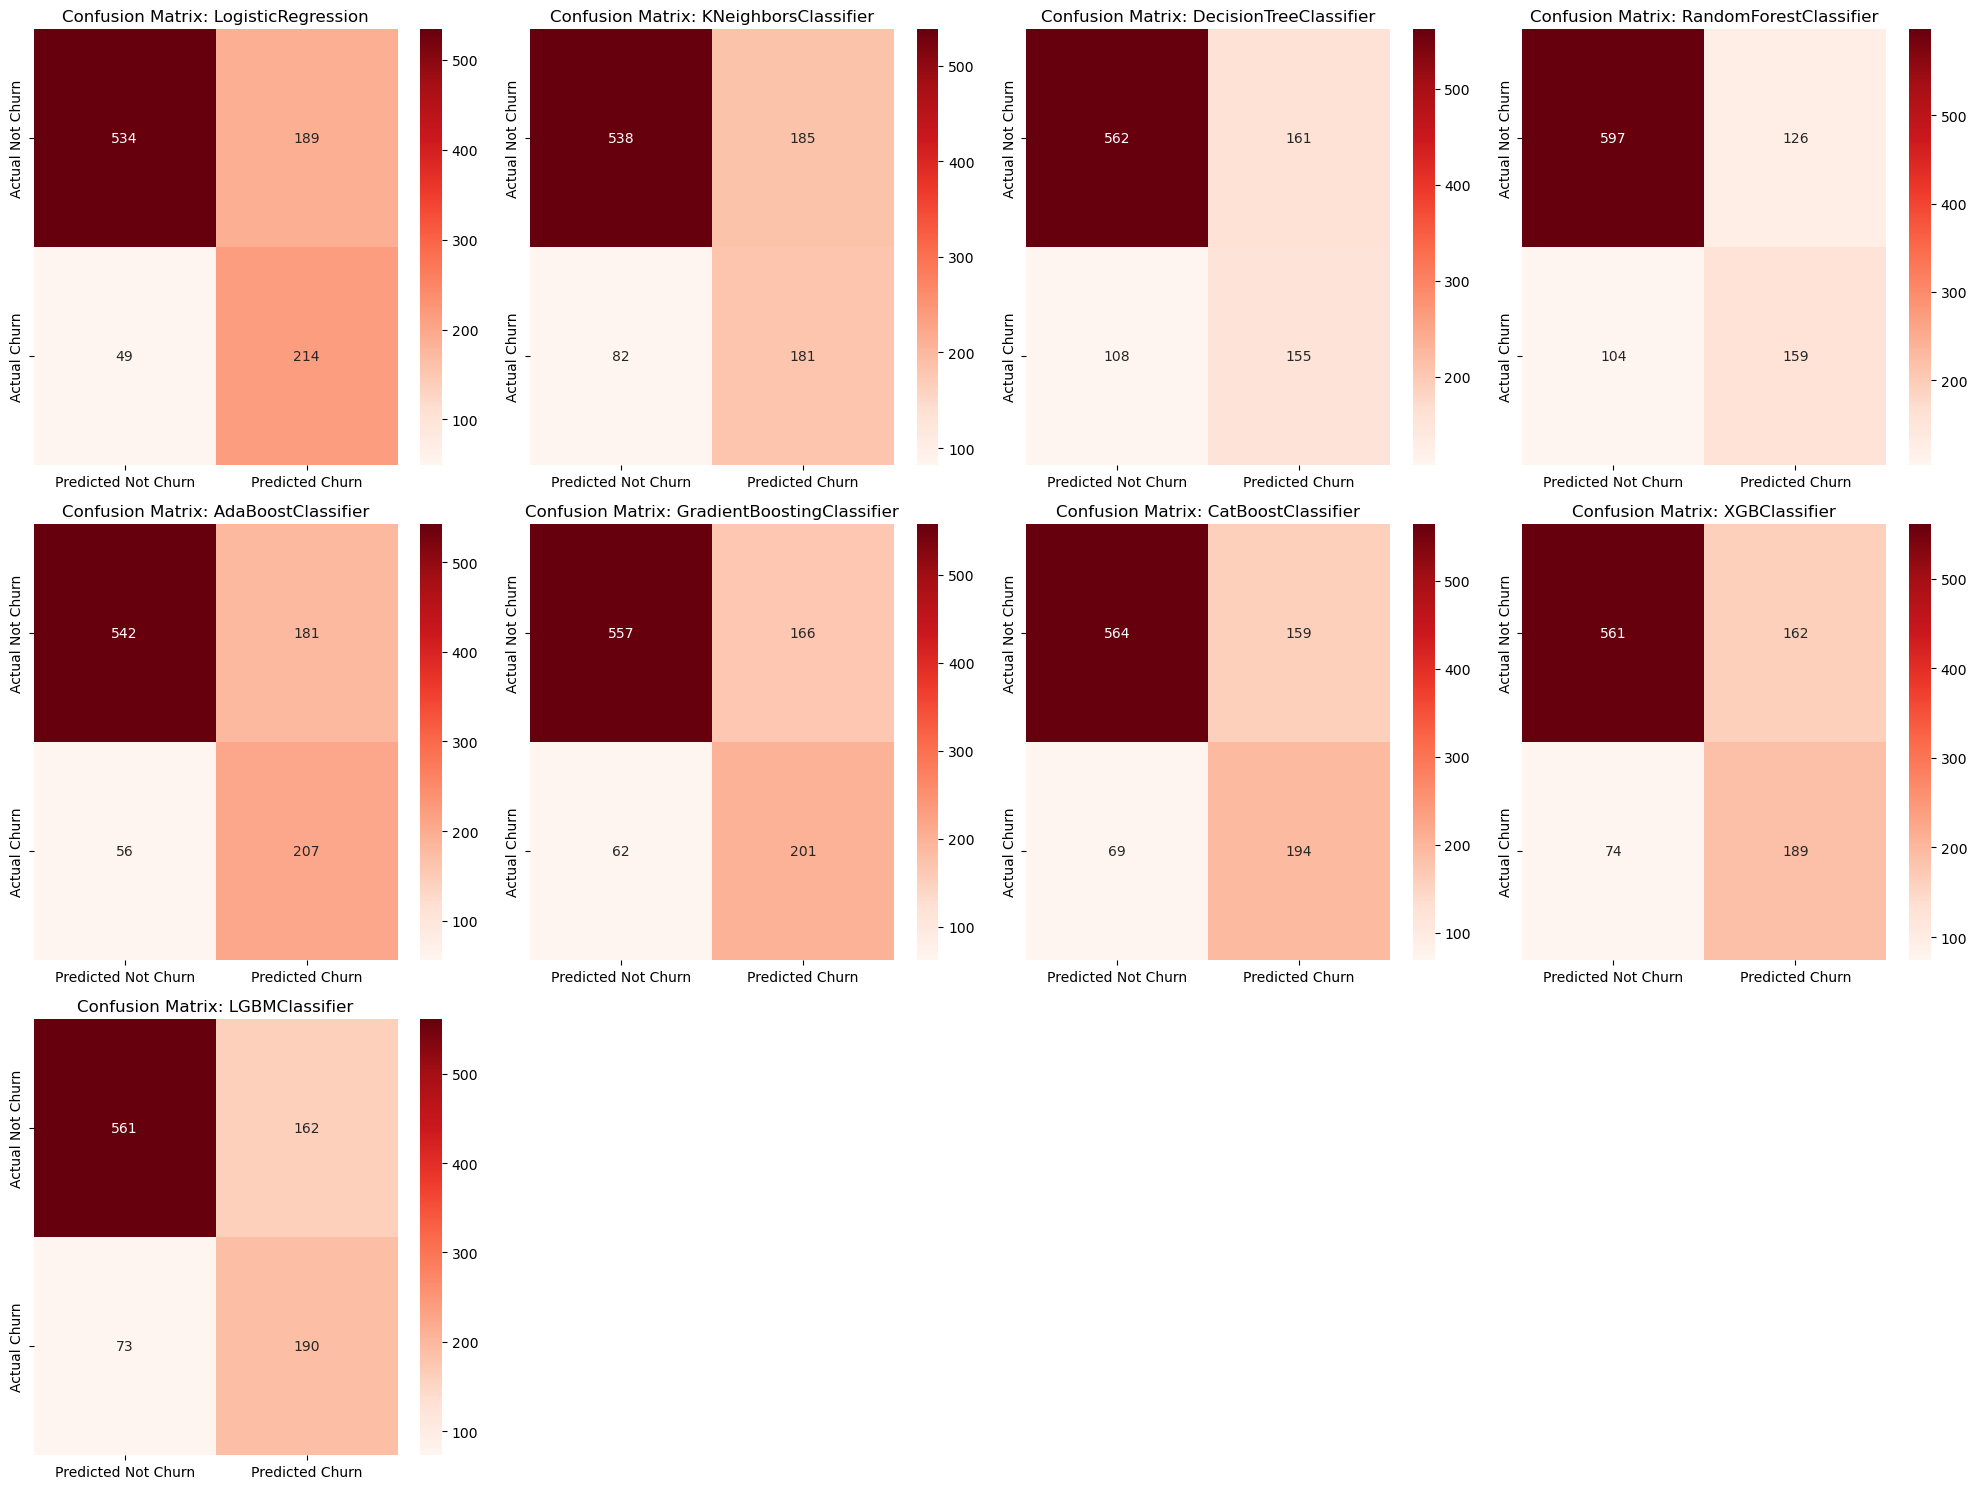

In [350]:
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Flatten the 2D array of axes for easier iteration
axes_flat = axes.flatten()

for i, model_name in enumerate(models):
    sns.heatmap(conf_matrix[i], annot=True, fmt='d', cmap='Reds',
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes_flat[i])
    axes_flat[i].set_title(f"Confusion Matrix: {model_name.__class__.__name__}")

# Hide any unused subplots
for j in range(i + 1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

Berdasarkan matriks konfusi dan metrik kinerja yang diberikan, berdasarkan perolehan (kemampuan untuk mengidentifikasi dengan benar semua churn aktual), model pilihan terbaik adalah **Logistic Regression**. 

- **Recall**: Logistic Regression memiliki recall sekitar 81,01%, yang merupakan tertinggi di antara semua model. Artinya, ini adalah cara terbaik dalam mengidentifikasi pelanggan yang akan melakukan churn dengan benar.
- **Skor F1**: Ia juga memiliki skor F1 kompetitif, yang merupakan rata-rata harmonis antara presisi dan perolehan. Skor F1 yang tinggi menunjukkan model yang seimbang dengan performa yang baik dalam presisi dan perolehan.

Meskipun model lain mungkin memiliki akurasi atau presisi yang lebih tinggi, tujuan utamanya adalah meminimalkan risiko hilangnya potensi churn (sehingga memaksimalkan recall). Regresi Logistik dengan SMOTEENC menonjol sebagai pilihan terbaik di antara opsi yang tersedia. Model ini akan memastikan bahwa jumlah maksimum pelanggan yang kemungkinan akan churn teridentifikasi untuk potensi tindakan retensi

### HYPERPARAMETER TUNING 

Setelah kita melihat dan memilih yang terbaik dalam recall adalah logistic regression degan nilai 81,01% , selanjutnya kita akan melakukan tuning pada model yang kita pilih dengan Grid Search

Logistic Regression adalah cara untuk memprediksi peluang hasil 'ya' atau 'tidak', seperti apakah seseorang akan membeli suatu produk (ya atau tidak), atau apakah pasien mengidap suatu penyakit (ya atau tidak). Ini cukup populer karena sederhana dan efektif. Logistic Regression  adalah cara menarik garis yang paling baik dalam memisahkan dua kelompok, seperti memisahkan anggur dari semangka berdasarkan berat dan warnanya. Untuk regresi logistik, baris ini membantu kita memutuskan apakah suatu data baru, seperti email,  (bukan spam) atau  (spam)

In [351]:
hyperparam_space = {
    'model__penalty': ['l2', 'l1', 'elasticnet'], 
    'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'model__solver': ['saga', 'sag', 'lbfgs', 'newton-cg'],
    'model__max_iter': [100, 200, 300],  # More typical values for max_iter
}

logreg = LogisticRegression(random_state=42)
pipe_model = Pipeline([
    ('prep', transformer),  # Ensure transformer is defined
    ('scaler', scaler),     # Ensure scaler is defined
    ('resampling', resample), # Ensure resample is defined
    ('model', logreg)
])

random_search = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,  # Ensure skfold is defined
    scoring='recall',
    n_jobs=-1,
    random_state=42  # To ensure reproducibility
)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one_hot_encoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Dependents',
                                                                                'OnlineSecurity',
                                                                                'OnlineBackup',
                                                                                'DeviceProtection',
                                                                                'TechSupport',
                                                                                'PaperlessBilling']),
                                                                              ('ordinal',
                                                                               OrdinalEncoder(cols=...
                                              SMOTENC(categorical_features=[0,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5,
                                                                            6,
                                                                            7,
                                                                            8],
                                                      random_state=42)),
                                             ('model',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'model__C': [0.001, 0.005, 0.01, 0.05,
                                                     0.1, 0.5, 1.0],
                                        'model__max_iter': [100, 200, 300],
                                        'model__penalty': ['l2', 'l1',
                                                           'elasticnet'],
                                        'model__solver': ['saga', 'sag',
                                                          'lbfgs',
                                                          'newton-cg']},
                   random_state=42, scoring='recall')

In [352]:
print('Best Hyperparameters: ', random_search.best_params_)
print('Best Score: ', random_search.best_score_)

Best Hyperparameters:  {'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 300, 'model__C': 0.1}
Best Score:  0.7901873166328143


Score terbaik yang didapat adalah 79 % dengan parameter terbaiknya adalah {'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 300, 'model__C': 0.1}

In [353]:
random_search.best_score_

0.7901873166328143

In [354]:
logreg_tuning = random_search.best_estimator_
logreg_tuning.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['InternetService',
                                                                       'Contract'],
                                                                 mapping=[{'col': 'InternetService',
                                                                           'data_type': dtype('O'),
                                                                           'map...
No             1
dtype: int64},
                                                                          {'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None              0
Month-to-month    3
One year          2
Two year          1
dtype: int64}]),
                                                  ['InternetService',
                                                   'Contract'])])),
                ('scaler', MinMaxScaler()),
                ('resampling',
                 SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 7, 8],
                         random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=300, penalty='l1',
                                    random_state=42, solver='saga'))])

In [355]:
pd.DataFrame(random_search.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__solver,param_model__penalty,param_model__max_iter,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.663905,0.012662,0.026130,0.006747,saga,l1,300,0.1,"{'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 300, 'model__C': 0.1}",0.838095,0.744076,0.796209,0.763033,0.809524,0.790187,0.033373,1
2,0.652462,0.017640,0.021814,0.005187,newton-cg,l2,100,0.05,"{'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__max_iter': 100, 'model__C': 0.05}",0.819048,0.739336,0.800948,0.758294,0.804762,0.784478,0.030335,2
5,0.609185,0.035240,0.018949,0.002274,newton-cg,l2,100,0.5,"{'model__solver': 'newton-cg', 'model__penalty': 'l2', 'model__max_iter': 100, 'model__C': 0.5}",0.828571,0.725118,0.781991,0.758294,0.795238,0.777842,0.034800,3
0,0.652656,0.015562,0.000000,0.000000,sag,elasticnet,200,0.1,"{'model__solver': 'sag', 'model__penalty': 'elasticnet', 'model__max_iter': 200, 'model__C': 0.1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,0.638702,0.027045,0.000000,0.000000,lbfgs,l1,100,0.001,"{'model__solver': 'lbfgs', 'model__penalty': 'l1', 'model__max_iter': 100, 'model__C': 0.001}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [356]:
logreg_benchmark = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', LogisticRegression( random_state=42))
])

logreg_benchmark.fit(X_train, y_train)
y_pred_logreg_benchmark = logreg_benchmark.predict(X_test)
recall_score(y_test, y_pred_logreg_benchmark)*100

81.36882129277566

In [357]:
y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100

recall_logreg_tuning

82.12927756653993

nilai recall mengalami peningkatan setelah tunning dari 81,36 persen menjadi 82.12%, hal ini selaras dengan keinginan kita untuk meningkatkan nilai recall, dikarenakan niai recall adalah nilai evaluasi metrik yang kita gunakan

In [358]:
logreg_benchmark = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('resample', resample),
    ('algo', LogisticRegression( random_state=42))
])

logreg_benchmark.fit(X_train, y_train)
y_pred_tree_benchmark = logreg_benchmark.predict(X_test)

accuracy_before_tuning = accuracy_score(y_test, y_pred_logreg_benchmark) * 100
precision_before_tuning = precision_score(y_test, y_pred_logreg_benchmark) * 100
recall_before_tuning = recall_score(y_test, y_pred_logreg_benchmark)*100
f1_before_tuning = f1_score(y_test, y_pred_logreg_benchmark) * 100


logreg_after_tuning = pd.DataFrame({'Recall': recall_before_tuning,
                                    'Accuracy': accuracy_before_tuning,
                                   'Precision': precision_before_tuning,
                                  'F1': f1_before_tuning}, index=['Logistic Regression Before Tune'])
logreg_after_tuning

,Recall,Accuracy,Precision,F1
Logistic Regression Before Tune,81.368821,75.862069,53.101737,64.264264


In [359]:

y_pred_logreg_tuning = logreg_tuning.predict(X_test)

accuracy_logreg_tuning = accuracy_score(y_test, y_pred_logreg_tuning) * 100
precision_logreg_tuning = precision_score(y_test, y_pred_logreg_tuning) * 100
recall_logreg_tuning = recall_score(y_test, y_pred_logreg_tuning) * 100
f1_logreg_tuning = f1_score(y_test, y_pred_logreg_tuning) * 100


logreg_after_tuning = pd.DataFrame({'Recall': recall_logreg_tuning,
                                    'Accuracy': accuracy_logreg_tuning,
                                   'Precision': precision_logreg_tuning,
                                  'F1': f1_logreg_tuning}, index=['Logistic Regression After Tune'])
logreg_after_tuning

,Recall,Accuracy,Precision,F1
Logistic Regression After Tune,82.129278,75.659229,52.811736,64.285714


Berdasarkan gambar di atas, terdapat peningkatan pada skor 'recall' setelah penyetelan hyperparameter, meskipun hal ini menyebabkan penurunan 'presisi' karena adanya trade-off di antara keduanya

**MENYIMPAN MODEL TERPILIH**

In [360]:
final_model = random_search.best_estimator_
final_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['InternetService',
                                                                       'Contract'],
                                                                 mapping=[{'col': 'InternetService',
                                                                           'data_type': dtype('O'),
                                                                           'map...
No             1
dtype: int64},
                                                                          {'col': 'Contract',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': None              0
Month-to-month    3
One year          2
Two year          1
dtype: int64}]),
                                                  ['InternetService',
                                                   'Contract'])])),
                ('scaler', MinMaxScaler()),
                ('resampling',
                 SMOTENC(categorical_features=[0, 2, 3, 4, 5, 6, 7, 8],
                         random_state=42)),
                ('model',
                 LogisticRegression(C=0.1, max_iter=300, penalty='l1',
                                    random_state=42, solver='saga'))])

Final model yang kita pilih adalah logistic Regresion yang sudah di tuning, hal ini ditandai dengan terjadinya peningkatan pada nilai recall

### FEATURE IMPORTANCES

Mari sekarang kita lihat fitur/kolom apa saja yang paling penting untuk model Logistic Regression kita

In [364]:
names = transformer.get_feature_names_out
names

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'PaperlessBilling']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['InternetService',
                                                      'Contract'],
                                                mapping=[{'col': 'InternetService',
                                                          'data_type': dtype('O'),
                                                          'mapping': None           0
Fiber optic    3
DSL            2
No             1
dtype: int64},
                                                         {'col': 'Contract',
                                

In [369]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:  # the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1], Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names_out(raw_col_name)
        except AttributeError:
            names = raw_col_name
        col_name.extend(names)
    return col_name

# Usage:
# Assuming your_column_transformer is defined earlier
names = get_column_names_from_ColumnTransformer(transformer)  # Pass your ColumnTransformer object here

# Given columns and codes
columns = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
codes = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']
list_name = []

# Replace variable codes with column names
for i, (code, column) in enumerate(zip(codes, columns)):
    list_name.append(names[i].replace(code, column))

# Extend the list with additional column names
additional_columns = ['ordinal__InternetService', 'ordinal__Contract', 'tenure', 'MonthlyCharges']
list_name.extend(additional_columns)

print(list_name)

['Dependents_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'PaperlessBilling_Yes', 'ordinal__InternetService', 'ordinal__Contract', 'tenure', 'MonthlyCharges']


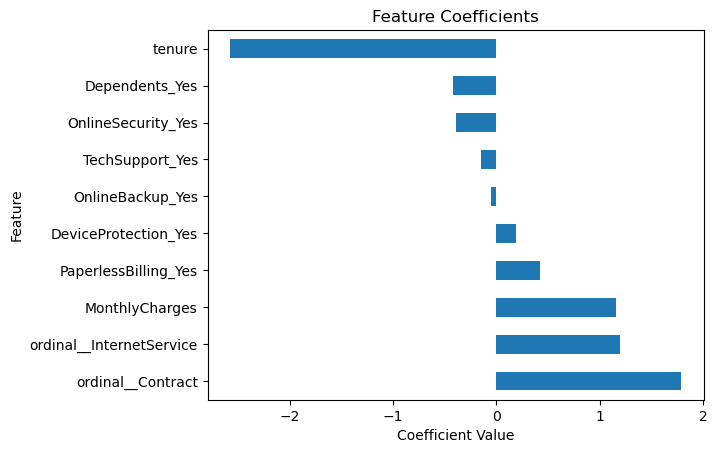

In [374]:
coefficients = logreg_tuning['model'].coef_[0]

# Create a Series with coefficients and corresponding feature names
coef1 = pd.Series(coefficients, index=list_name).sort_values(ascending=False).head(10)

# Plot the coefficients
coef1.plot(kind='barh', title='Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Terlihat bahwa ternyata untuk model log regresi kita, fitur/kolom `Contract` adalah yang paling penting, kemudian diikuti dengan `internet service` dan `MonthlyCharges`. Sedangkan fitur seperti `tenure` menunjukkan bahwa konsumen yang sudah lama berlangganan akan sulit untuk churn .

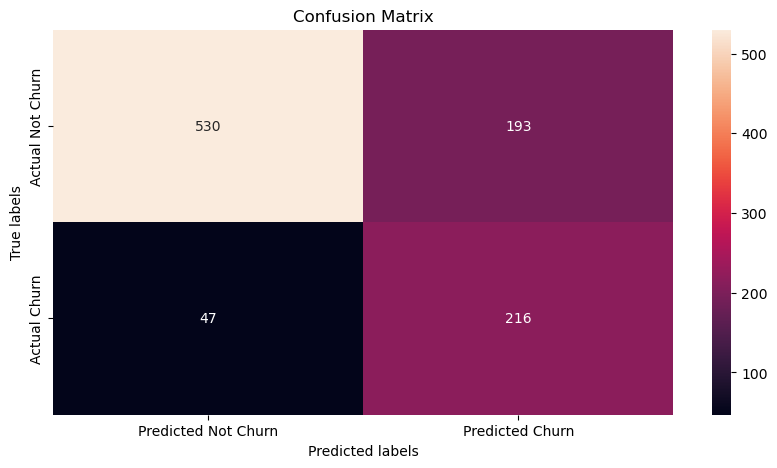

In [379]:
fig, axes = plt.subplots(figsize=(10, 5))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg_tuning)

# Create heatmap
sns.heatmap(cm, annot=True, fmt=".0f", xticklabels=['Predicted Not Churn', 'Predicted Churn'],
            yticklabels=['Actual Not Churn', 'Actual Churn'], ax=axes)

# Set axis labels and title
axes.set_xlabel('Predicted labels')
axes.set_ylabel('True labels')
axes.set_title('Confusion Matrix')

# Show plot
plt.show()









Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model Decision Tree yang telah kita buat didapati:
- Jumlah pelanggan yang aktualnya churn dan diprediksi akan churn (True Positive) : 216 orang
- Jumlah pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 47 orang
- Jumlah pelanggan yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 530 orang
- Jumlah pelanggan yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 193 orang
- Jumlah pelanggan yang diprediksi akan churn sebanyak 193 + 216 = 409 orang
- Jumlah pelanggan yang diprediksi tidak akan churn sebanyak 530 + 47 = 577 orang

## **Perhitungan Penghematan Biaya**:

#### **Tanpa Mechine Learning:**
- Dengan asumsi kami mencoba mempertahankan semua pelanggan karena risiko churn dengan data aktual, biayanya adalah **$1** per pelanggan untuk **986 Pelanggan**.
- Jumlah pelanggan = 986
- Pelanggan yang churn = 261; Pelanggan Non-Churned = 725
- Total Biaya Retensi = Total pelanggan × $1.
- **Total Biaya = $986**

#### **Dengan Model Machinen Learning:**
- Kami hanya berusaha mempertahankan pelanggan yang diprediksi akan churn (TP + FP).
- False Negatif menunjukkan pelanggan yang berhenti berlangganan dan memerlukan akuisisi.
- Total Biaya = (TP × Biaya Retensi) + (FP × Biaya Retensi) + (FN × Biaya Akuisisi).

Mari terapkan perhitungan ini ke model akhir:

- True Positives (TP): 216 pelanggan yang diidentifikasi dengan benar sebagai churn.
- False Positives (FP): 193 pelanggan salah diidentifikasi sebagai churn.
- False Negatives (FN): 47 pelanggan salah diidentifikasi sebagai tidak melakukan churn.

#### Biaya yang Dihitung:
- Biaya Retensi per pelanggan: $1.
- Biaya Akuisisi per pelanggan: $5 (karena lima kali lipat biaya retensi). (Dibayar saat proses registrasi)

#### Perhitungan Biaya Akhir:
- Total Biaya dengan Model ML = (TP × $1) + (FP × $1) + (FN × $5)
- Total Biaya dengan Model ML = (216 × $1) + (193 × $1) + (47 × $5)
- Total Biaya Dengan Model ML = $644

### Penghematan biaya:

 Tanpa Biaya Retensi Model Machine Learning: **$986**.

 Dengan Total Biaya Model Machine Learning: **$644**.

 Terdapat selisih biaya sebesar $342

**Batasan Model (limit)**

Kita harus berhati-hati ketika melakukan interpretasi di luar interval amatan independen variabel.

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

* `tenure` antara 0 sampai dengan 72 bulan 
* `MonthlyCharges` antara 18.8 sampai dengan 118.65
* `Contract` dalam jangka Month-to-month, One year, dan Two Year
* `InternetService` berupa 'DSL', 'Fiber Optic' dan 'No'
* `Dependent, Paperless Billing` dengan nilai 'Yes' atau 'No'
* `OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport` berisi pilihan 'Yes', 'No' atau 'No internet service'.

## KESIMPULAN

- Metric utama yang digunakan adalah recall, dimana terdapat peningkatan nilai recall dan penurunan nilai FN pada model setelah di tuning

- Model terbaik yang didapat adalah logistric regression yang telah di hyperparameter tuning dengan RandomSearch dengan parameter terbaik adalah {'model__solver': 'saga', 'model__penalty': 'l1', 'model__max_iter': 300, 'model__C': 0.1}

- Berdasarkan permodelan nilai feature/kolom terpenting adalah contract dan berpengaruh terhadap churn, kemudian diikuti oleh internet service dan monthlycharge

- Berdasarkan contoh perhitungan biaya :
    - Potensi kerugian yang mungkin didapat tanpa adanya penerapan machine learning diperkirakan sebesar : $986 per bulan untuk 986 pelanggan
    - Potensi kerugian yang mungkin didapat dengan menerapkan model Logistic regression yang telah dibuat diperkirakan sebesar : $644 per bulan untuk 986 pelanggan
    - terdapat selisih kerugian sebesar $ 342

## REKOMENDASI

DALAM hal bisnis yang harus dilakukan adalah :

- Memberikan insentif atau reward yang menarik bagi pelanggan untuk beralih dari `Contract` Month-to-month yang bersifat jangka pendek menjadi `Contract` One year atau Two year yang lebih bersifat jangka panjang

- Menagadakan loyalty program kepada pelanggan dengan tenure yang tinggi

- Memberikan diskon/potongan harga `MonthlyCharges` bagi pegawai yang terindikasi/diprediksi akan churn, khususnya untuk pelanggan yang memiliki `MonthlyCharges`yang tinggi

- Memberikan `Layanan Internet` yang lebih murah, hal ini dapat membantu pelanggan agar tidak melakukan churn dan cenderung untuk bertahan

- melakukan survey berkelanjutan pada setiap bulannya terkait dengan kualitas telekomunikasi yang dirasakan pelanggan

Dalam Hal Machine Learning :

- Mencoba algorithm ML dan hyperparameter tuning yang berbeda (misal algoritma Decision Tree, CatBoost, etc) serta menggunakan teknik oversampling yang berbeda selain SMOTENC. 

- Memantau performa model secara konsisten dan perbarui dengan data baru agar daya prediksinya tetap akurat.

- Melakukan penambahan data khususnya untuk kelas minoritas (Churn) agar dapat membantu meningkatkan performa model

- Menggunakan metric lain seperti Roc Auc untuk mengevaluasi model

- Menambbahkan lebih banyak fitur/ kolom seperti jenis telekomunikasi suara, sms, dan internet

- Menambahkan fitur-fitur atau kolom baru yang berisi tingkat kepuasan pelanggan untuk masing-masing layanan, sehingga dapat diketahui lebih lanjut apakah churn disebabkan oleh kualitas layanan yang buruk atau tidak

In [380]:
import pickle

In [381]:
file_name = 'model.sav'
pickle.dump(final_model, open(file_name, 'wb'))